In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import numpy as numpy
import plotly.express as px
import seaborn as sns; sns.set_theme()
from sklearn.preprocessing import StandardScaler as StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA as sklearnPCA
from matplotlib.colors import ListedColormap

In [3]:
df = pd.read_csv('job-market.csv')
df.head()

Id                                              Title  \
0  37404348.0                           Casual Stock Replenisher   
1  37404337.0                           Casual Stock Replenisher   
2  37404356.0  RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...   
3  37404330.0                              Team member - Belrose   
4  37404308.0  Business Banking Contact Centre Specialist, Ni...   

                                          Company                      Date  \
0                                     Aldi Stores  2018-10-07T00:00:00.000Z   
1                                     Aldi Stores  2018-10-07T00:00:00.000Z   
2                             LB Creative Pty Ltd  2018-10-07T00:00:00.000Z   
3                          Anaconda Group Pty Ltd  2018-10-07T00:00:00.000Z   
4  Commonwealth Bank - Business & Private Banking  2018-10-07T00:00:00.000Z   

                  Location                         Area  \
0                   Sydney  North West & Hills District   
1    Richmond & Hawkesbury                          NaN   
2                 Brisbane          CBD & Inner Suburbs   
3  Gosford & Central Coast                          NaN   
4                   Sydney        Ryde & Macquarie Park   

                   Classification  SubClassification  \
0      Retail & Consumer Products  Retail Assistants   
1      Retail & Consumer Products  Retail Assistants   
2      Retail & Consumer Products  Retail Assistants   
3      Retail & Consumer Products  Retail Assistants   
4  Call Centre & Customer Service    Sales - Inbound   

                                         Requirement FullDescription  \
0  Our Casual Stock Replenishers pride themselves...             NaN   
1  Our Casual Stock Replenishers pride themselves...             NaN   
2  BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA             NaN   
3  Bring it on - do you love the great outdoors a...             NaN   
4  We are seeking highly articulate, enthusiastic...             NaN   

   LowestSalary  HighestSalary JobType  
0           0.0           30.0     NaN  
1           0.0           30.0     NaN  
2           0.0           30.0     NaN  
3           0.0           30.0     NaN  
4           0.0           30.0     NaN

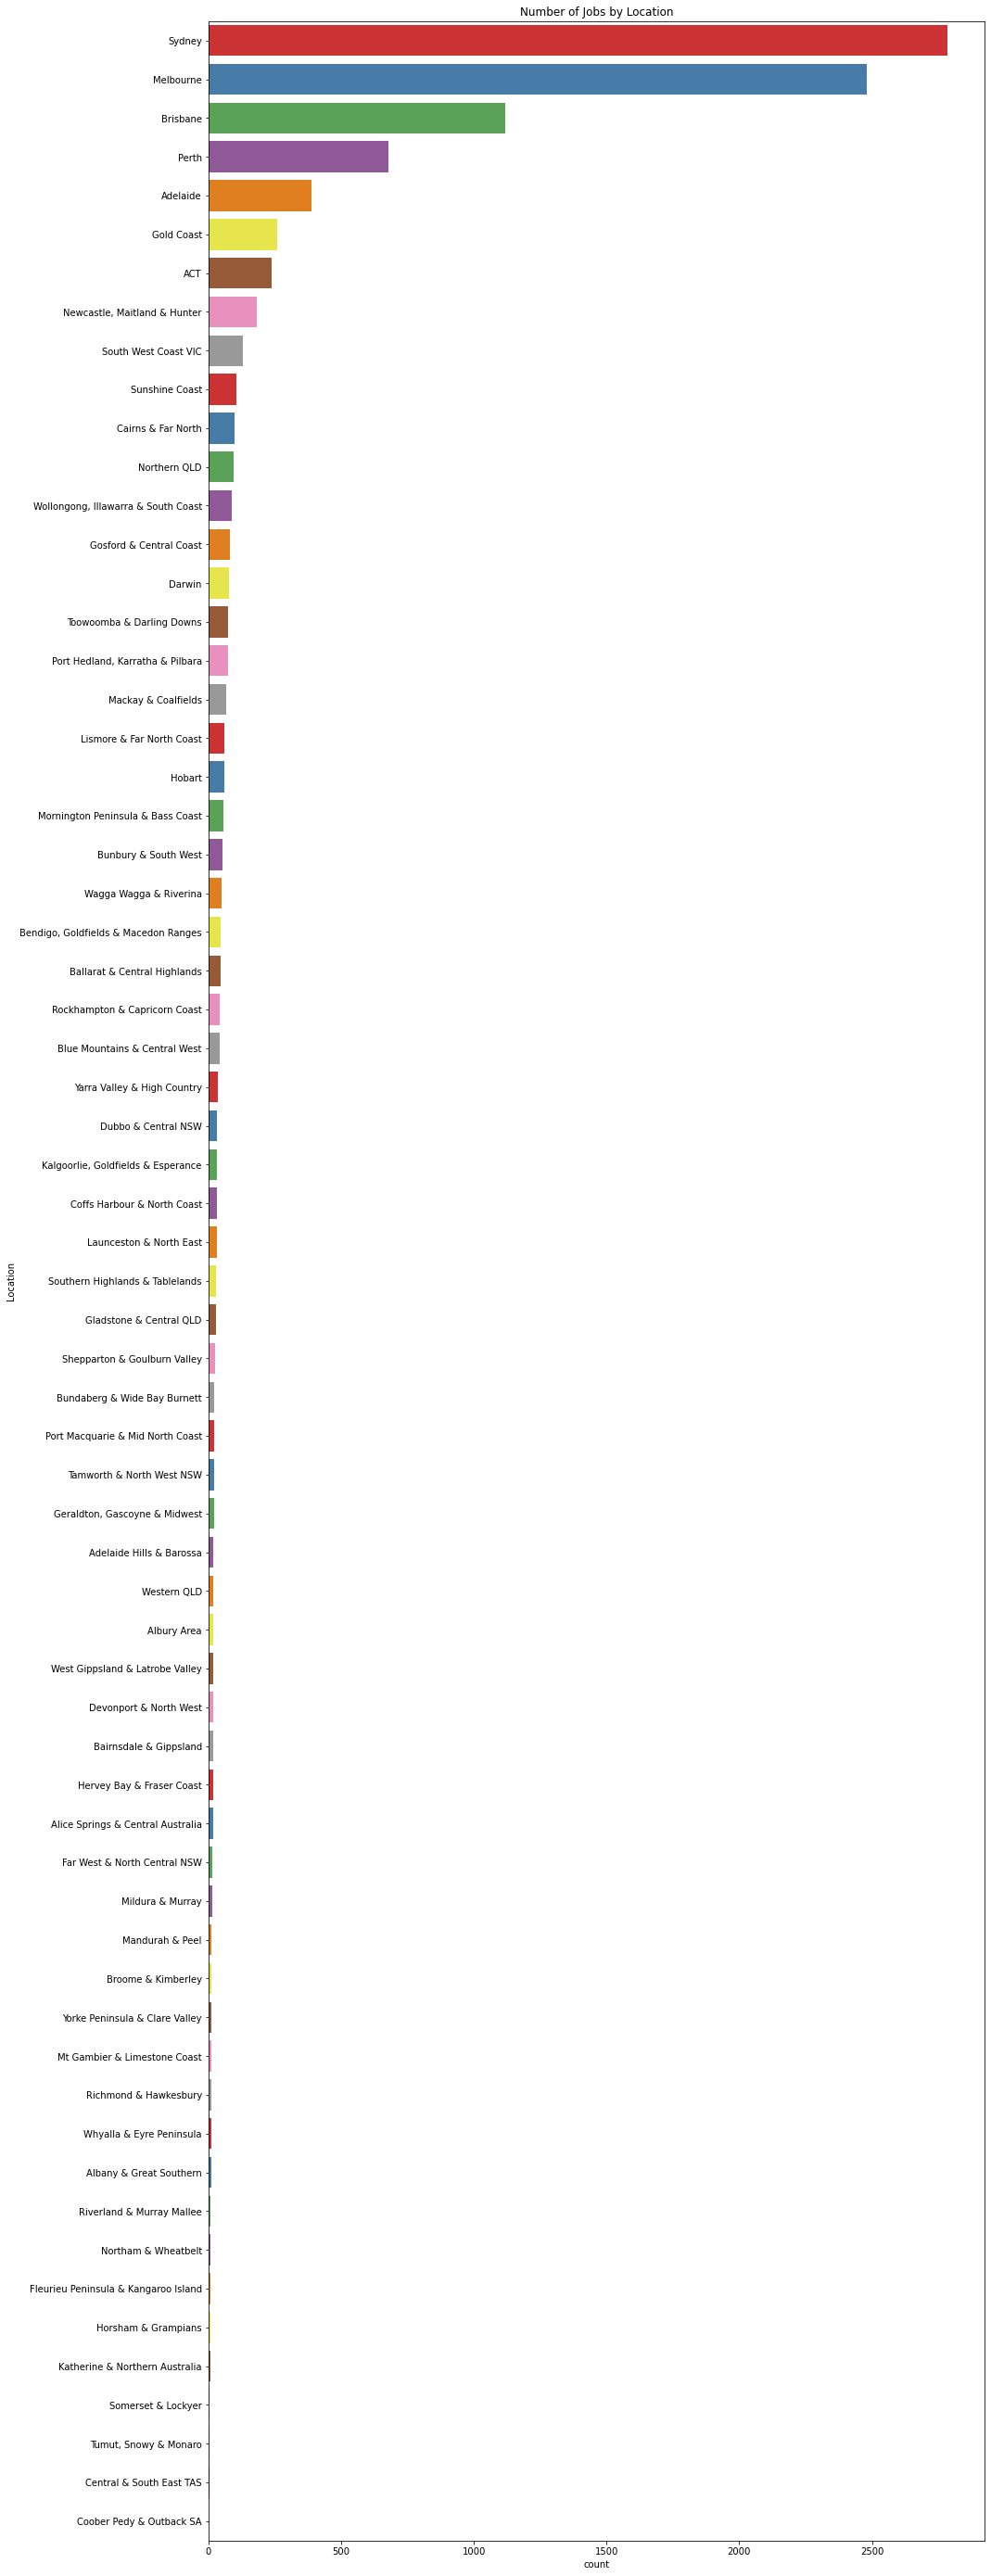

In [28]:
plt.figure(figsize=(15,50))
ax = sns.countplot(y="Location", data=df,order=df['Location'].value_counts().index,palette="Set1").set_title("Number of Jobs by Location")


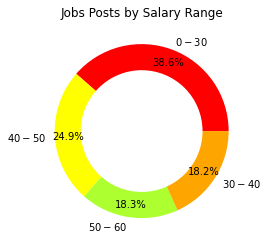

In [4]:
# Exercise to create a pie chart with the salary range
Salary_range=df[['LowestSalary','HighestSalary']].value_counts()

Salary_name = ['$0-$30','$40-$50','$50-$60','$30-$40']
colors = ['#FF0000', '#FFFF00', 
          '#ADFF2F', '#FFA500']
  
# Pie Chart
plt.pie(df[['LowestSalary','HighestSalary']].value_counts(), colors=colors, labels=Salary_name,autopct='%1.1f%%',pctdistance=0.85)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Jobs Posts by Salary Range')
  
# Displaying Chart
plt.show()

In [3]:
#Data correlation - wine data
data = pd.read_csv('wine.data.csv')
data.head()

y=data.Label
x=data.drop("Label", axis=1)

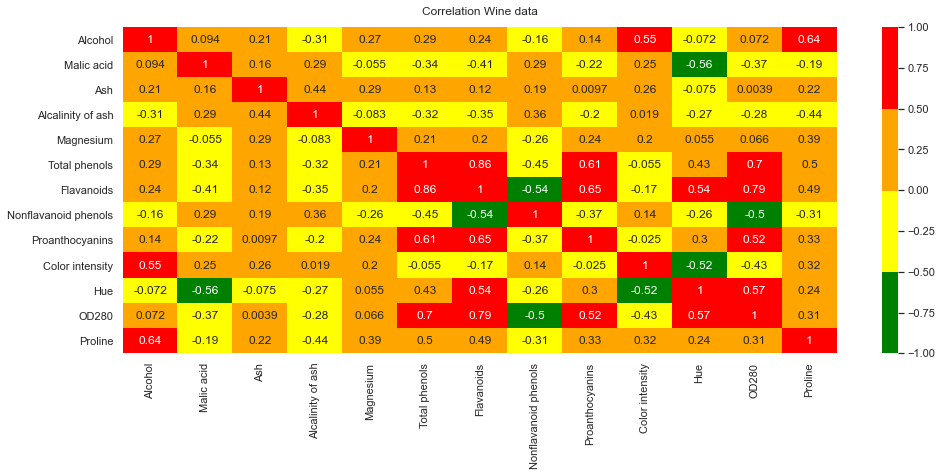

In [16]:
plt.figure(figsize=(16, 6)) # increase the size of the chart
ax = sns.heatmap(x.corr(), cmap=ListedColormap(['green', 'yellow','orange','red']),vmin=-1, vmax=1, annot=True)
ax.set_title('Correlation Wine data', fontdict={'fontsize':12}, pad=12);

In [12]:
fig = px.scatter_matrix(x)

fig.update_layout(
    title='Wine',
    dragmode='select',
    width=1800,
    height=1800,
    hovermode='closest',
)
fig.show()

Most of the variables have low correlation between each other, when it's possible to see from the graphs that most of them do no form a pattern. From the heatmap, it's possible to visualise that there is a high correlation between Total phenois and flavanoids, in which is also possible to see in the chart that we could draw a line of tendency from the points. OD280 and flavanoids have also a high correlation, although in the chart the pattern is not straighforward. Hue and Malic acid have a negative correlation, when it's possible from the graphs to see the negative inclination of the line formed by the points.

Wine dataset


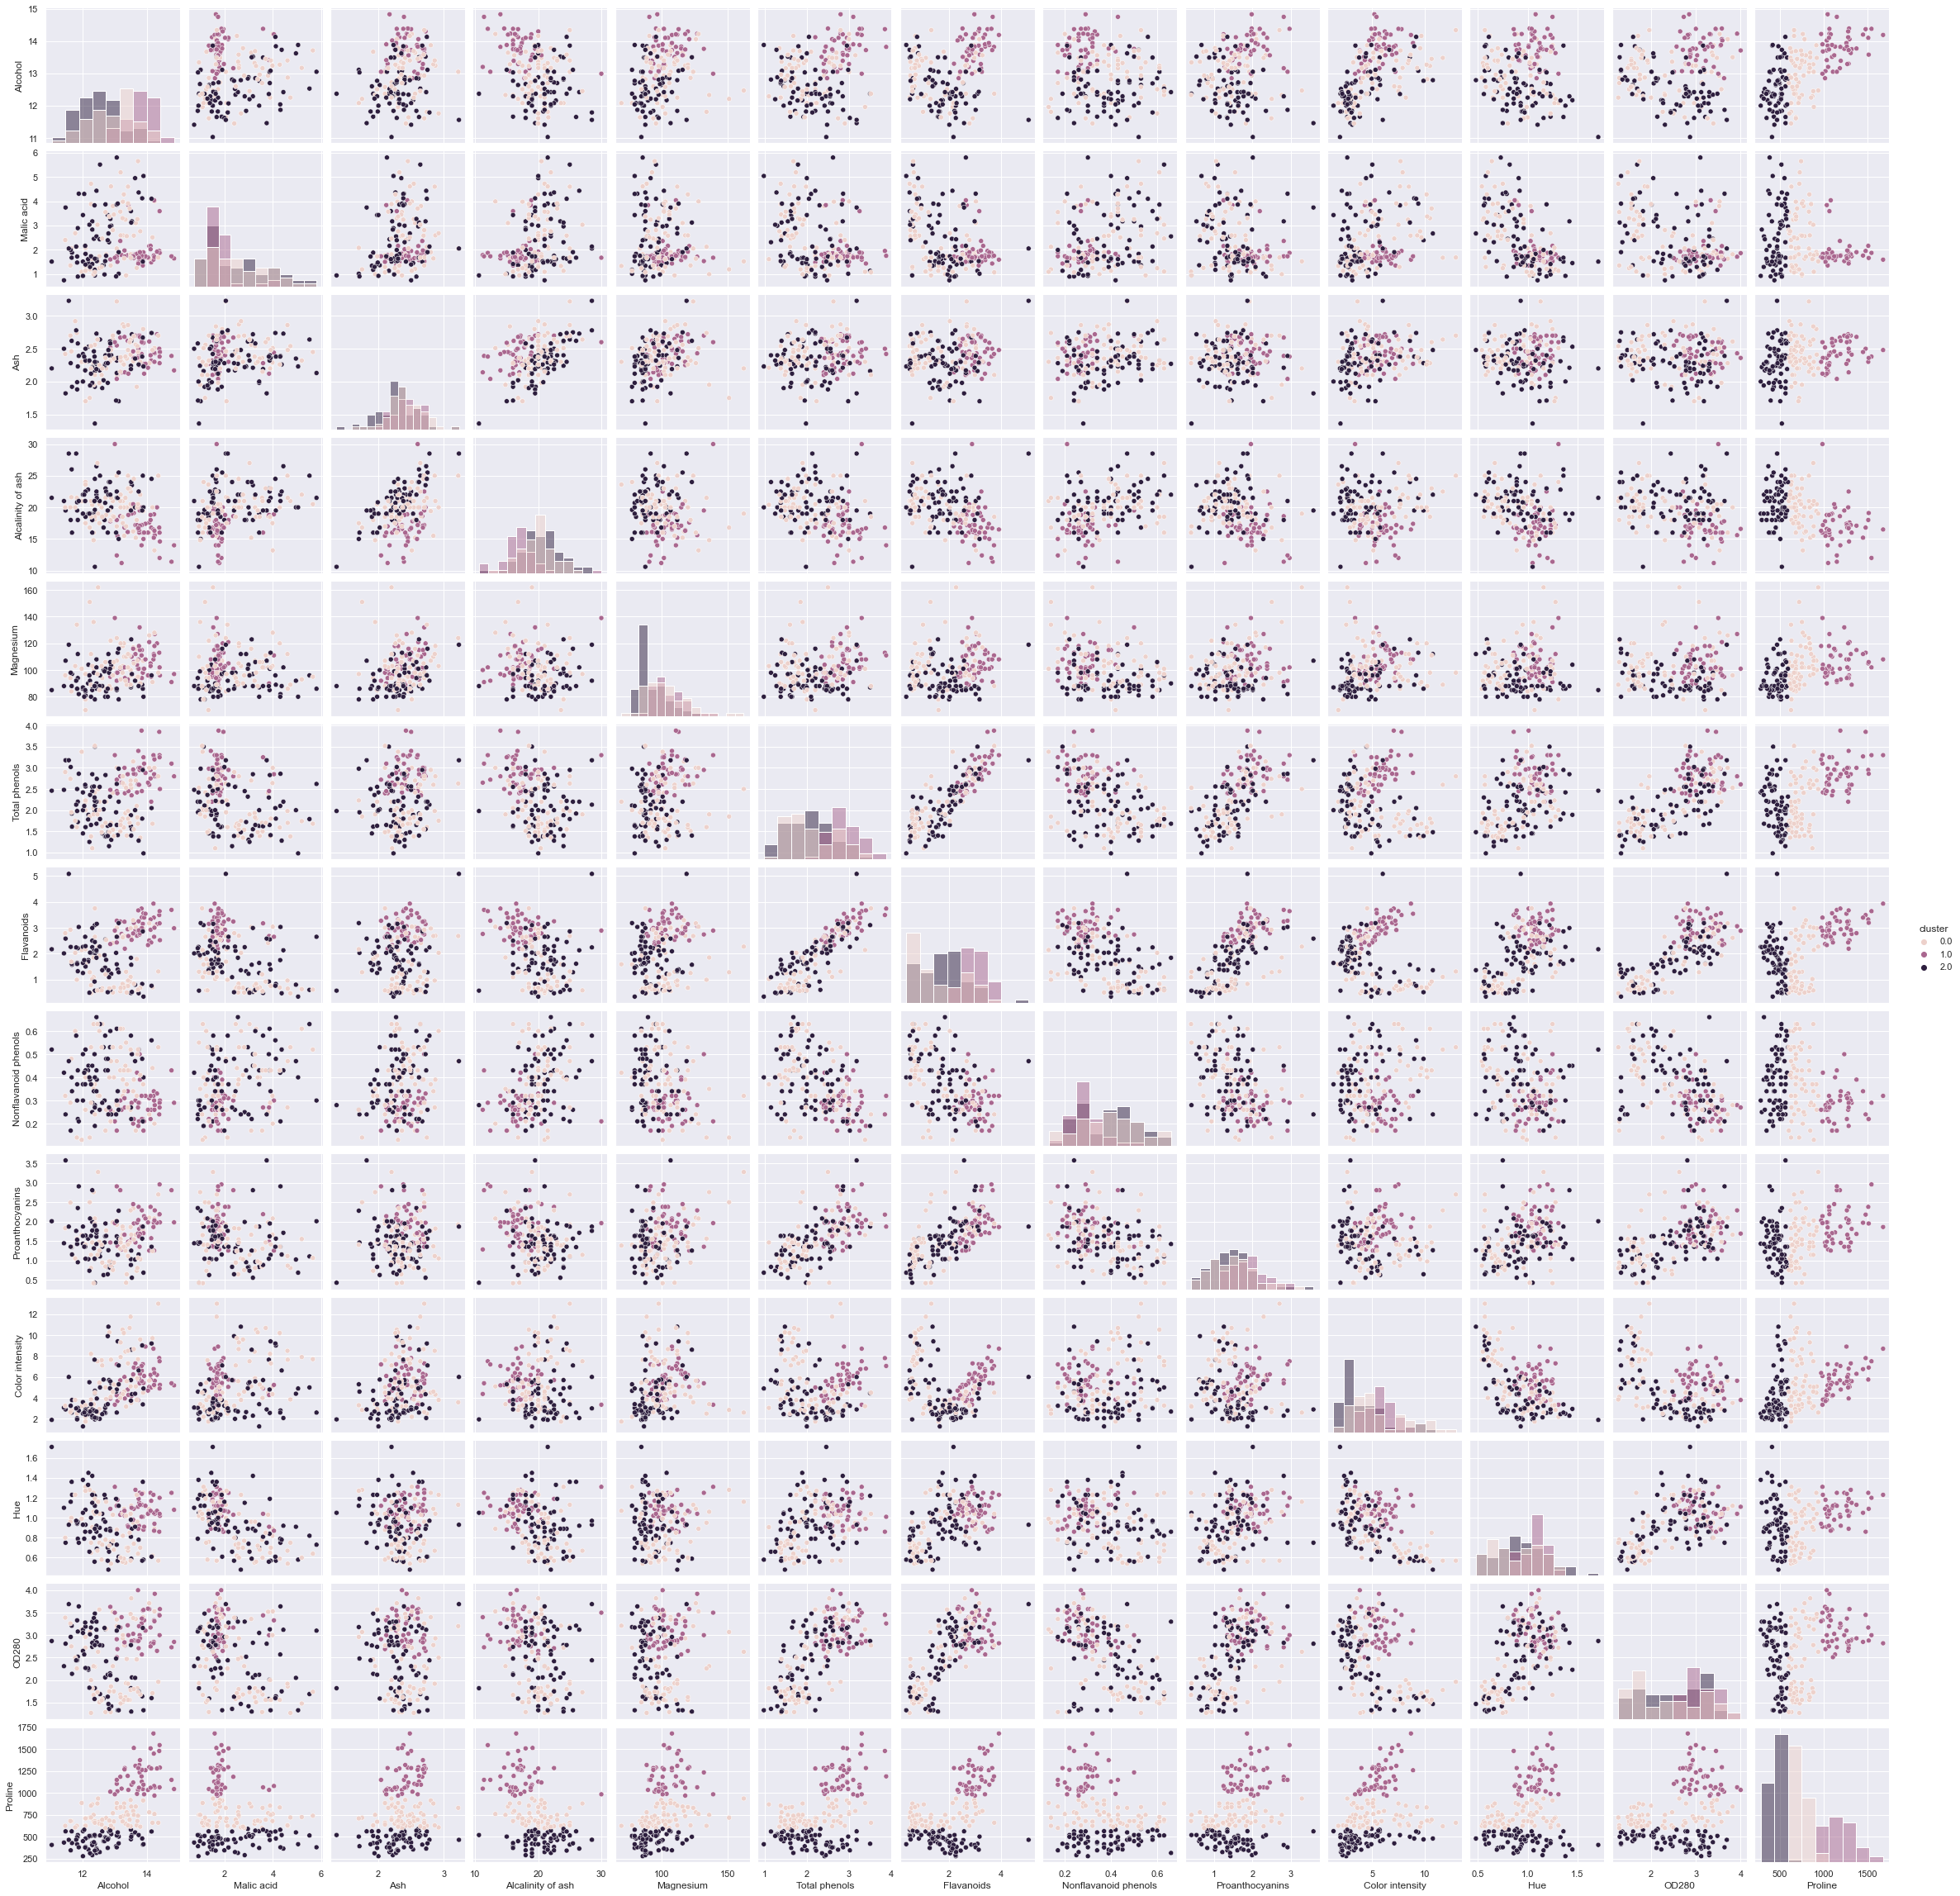

In [29]:
kMeansClustering = KMeans(n_clusters = 3, random_state=0) 
res = kMeansClustering.fit_predict(x)
print("Wine dataset")

x["cluster"] = res.astype('float64') 
sns_plot = sns.pairplot(x, hue = "cluster",diag_kind="hist")


In [26]:
# normalising the data
standardScaler = StandardScaler()
standardScaler.fit(x)
X_scaled_array = standardScaler.transform(x)
normalizedData = pd.DataFrame(X_scaled_array, columns = x.columns)



Wine dataset


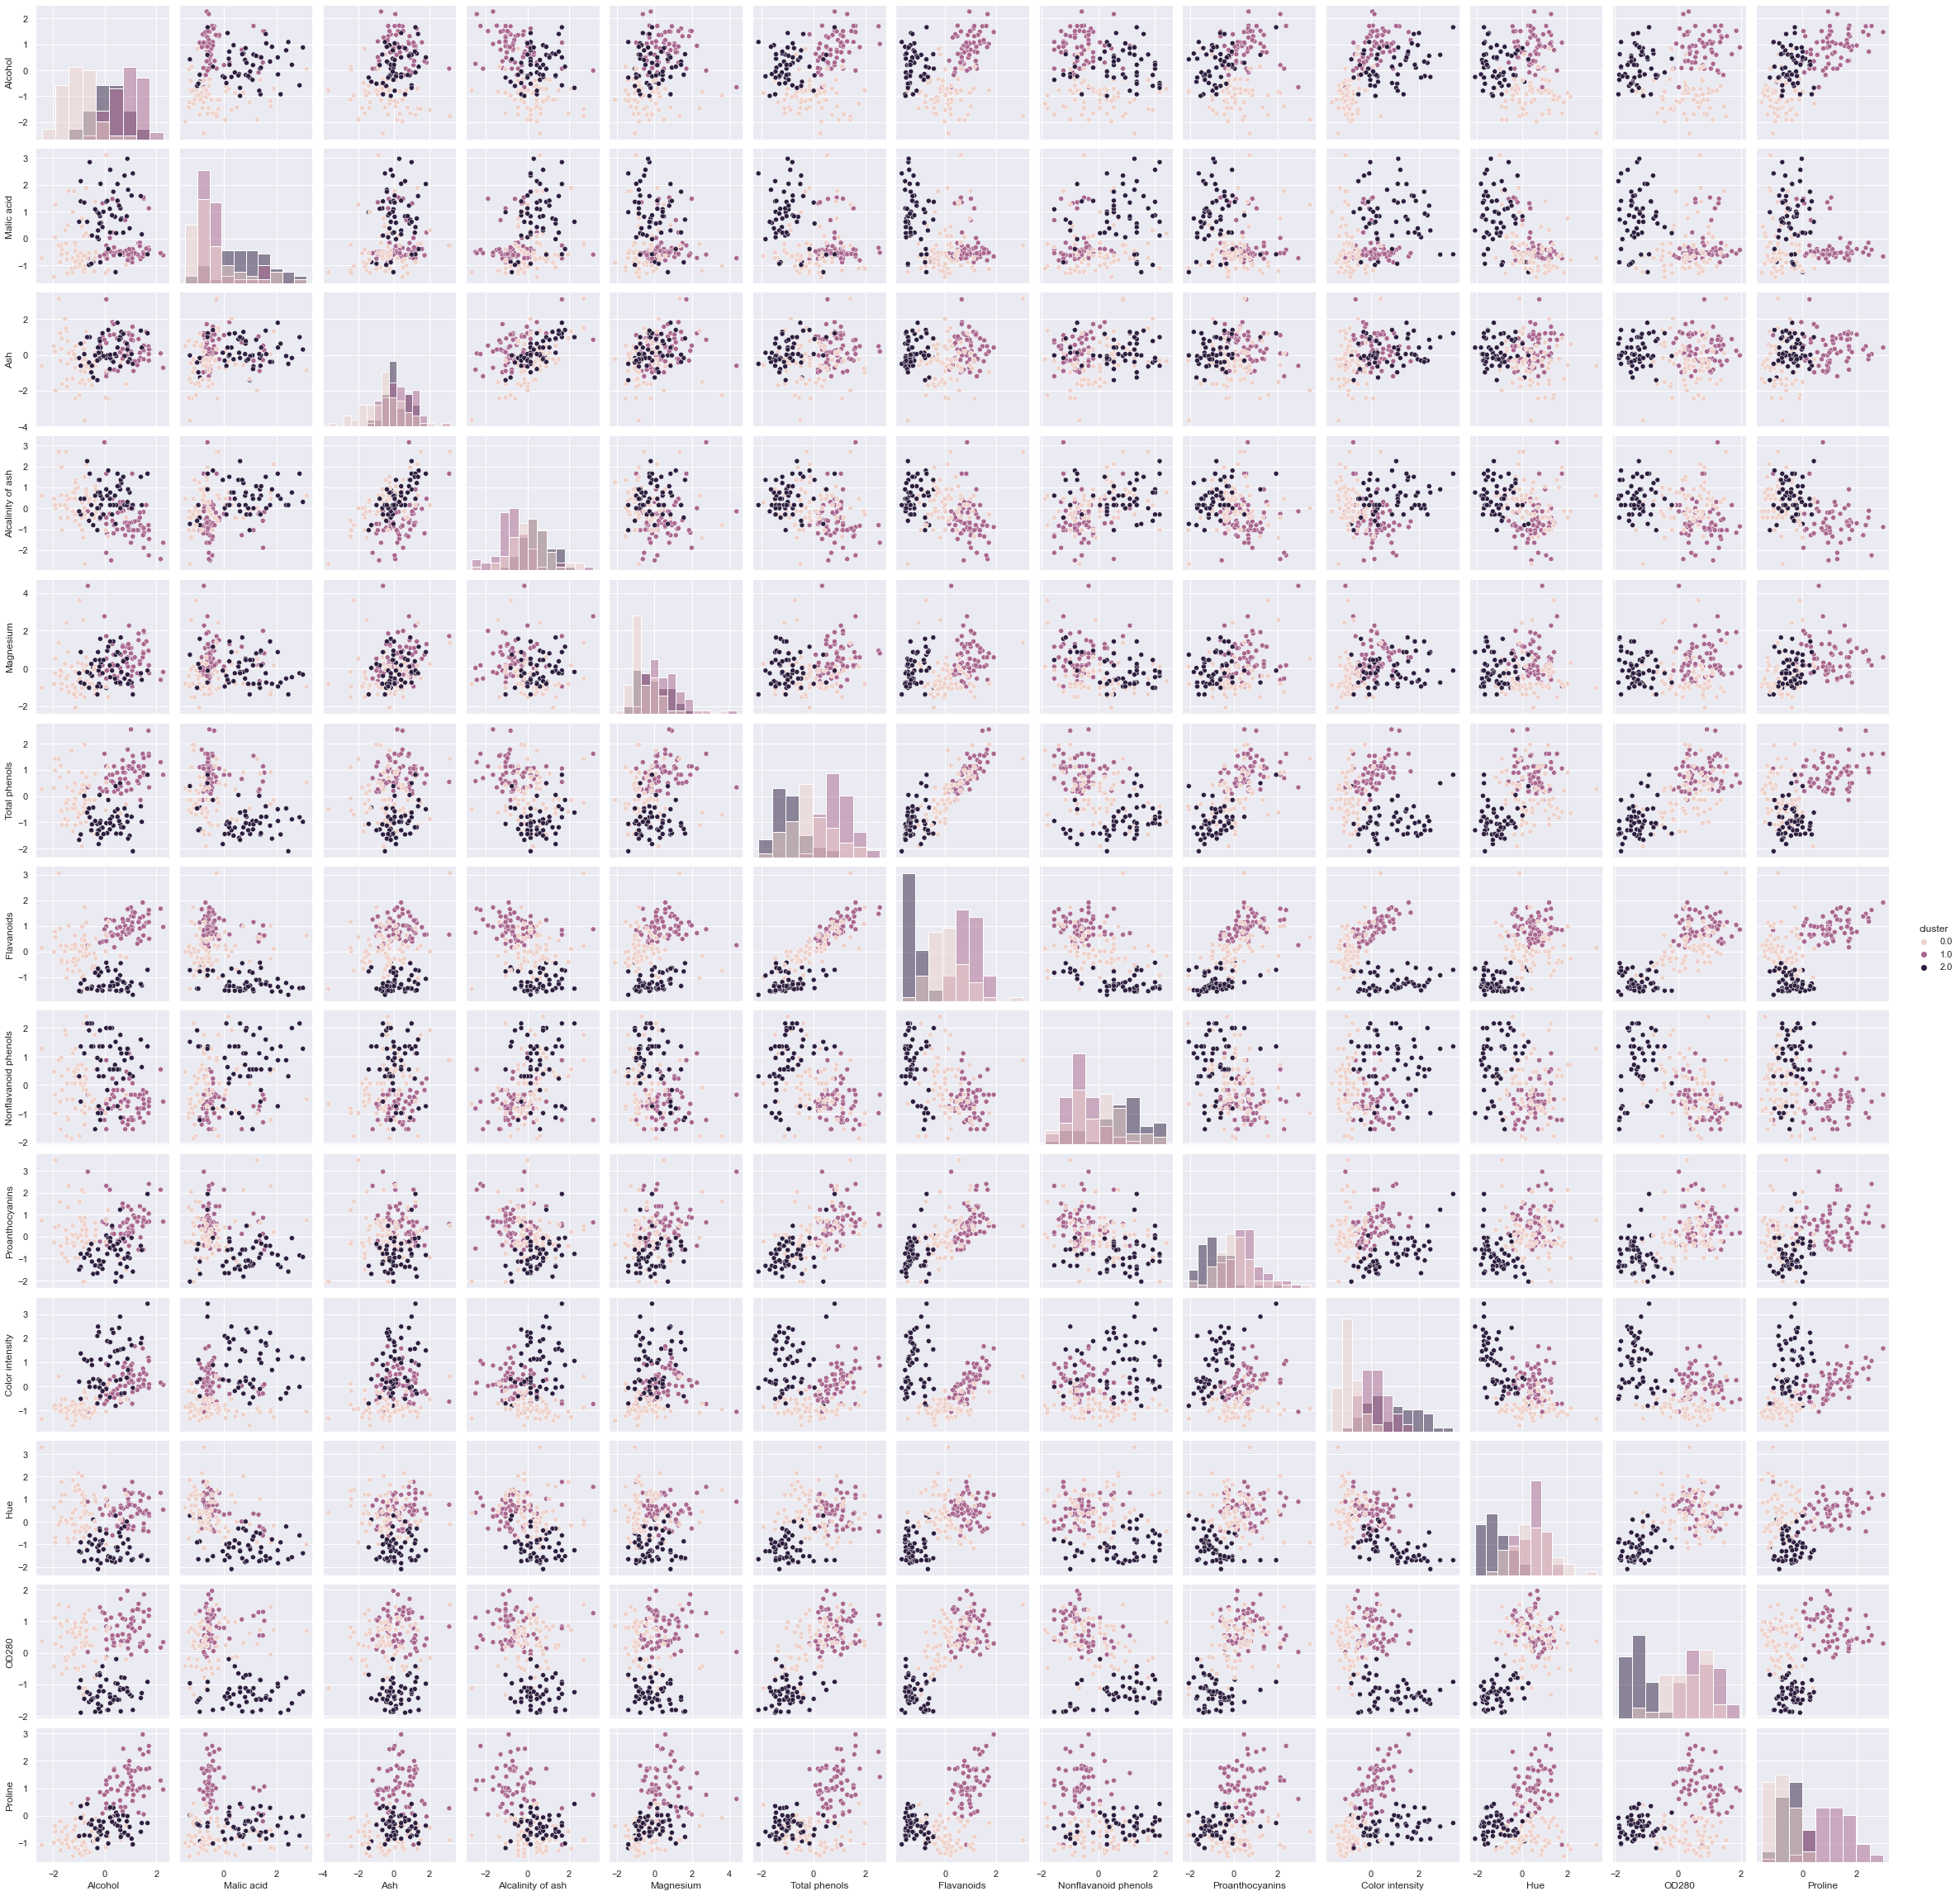

In [30]:
# using kmeans again with the data normalised
kMeansClustering = KMeans(n_clusters = 3, random_state=0) 
res = kMeansClustering.fit_predict(normalizedData)
print("Wine dataset")

normalizedData["cluster"] = res.astype('float64') 
sns_plot = sns.pairplot(normalizedData, hue = "cluster",diag_kind="hist")



I can see difference from the normalised dataset but I am not sure how to analyse the data normalised. The only part that I can see a good difference is in the flavanoids x Total phenois, where the clusters are in better order.